In [1]:
!pip install osmnx -q

In [2]:
import osmnx as ox
import matplotlib.pyplot as plt

/Users/wpcasas/Lab/pygeo/.venv_pygeo/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
lugar = 'Vila Ema, São José dos Campos'

rede = ox.graph_from_place(lugar)

In [4]:
rede

In [5]:
type(rede)

networkx.classes.multidigraph.MultiDiGraph

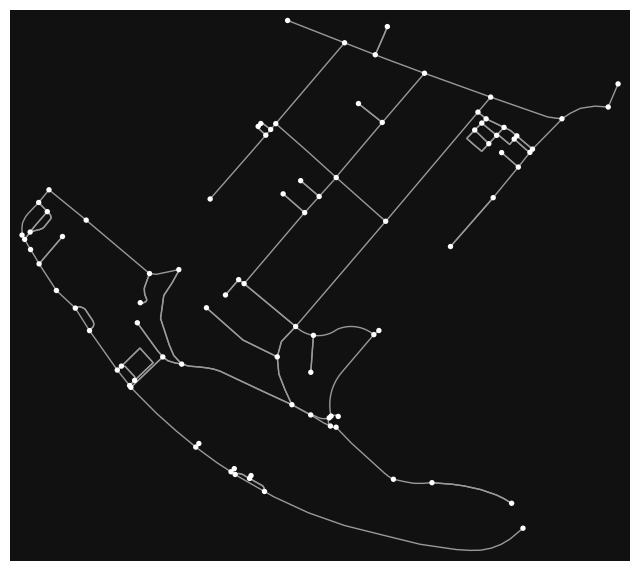

In [6]:
fig, ax = ox.plot_graph(rede)
plt.show()

<class 'geopandas.geodataframe.GeoDataFrame'>


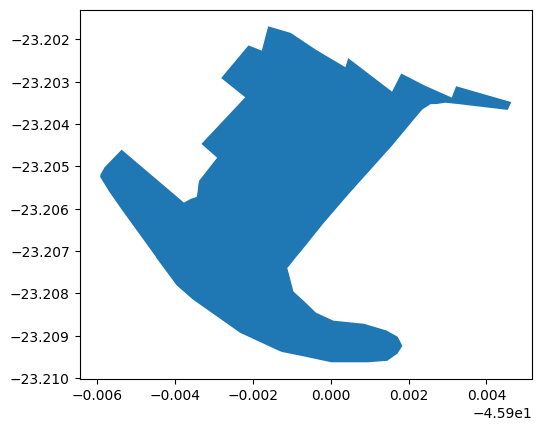

In [7]:
# Guardando el area 
area = ox.geocode_to_gdf(lugar)

print(type(area))

area.plot()
plt.show()

Obteniendo los poligonos del lugar

<class 'geopandas.geodataframe.GeoDataFrame'>


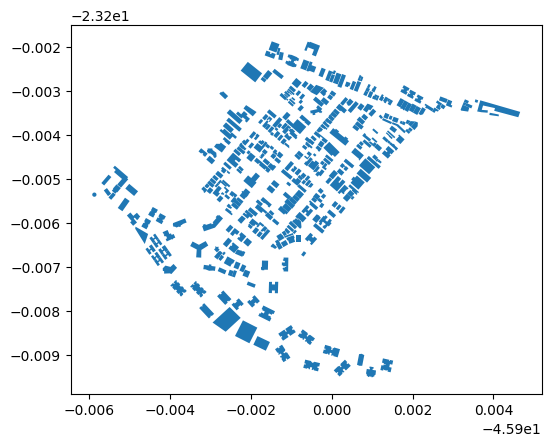

In [9]:
predios = ox.features_from_place(lugar, tags={'building':True})
print(type(predios))

predios.plot()
plt.show()

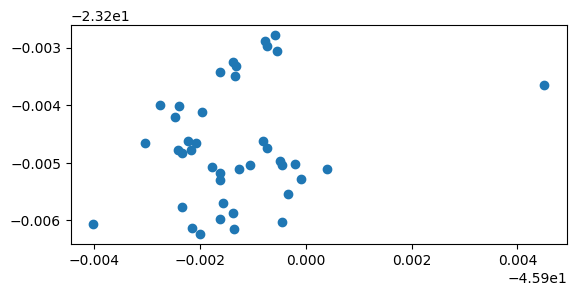

In [10]:
arvores = ox.features_from_place(lugar, tags={'natural':'tree'})

arvores.plot()
plt.show()

In [11]:
predios.head()

amenity  \
element_type osmid                         
way          303894210               NaN   
             303894211  place_of_worship   
             307255378               NaN   
             307255379               NaN   
             307255380               NaN   

                                                                 geometry  \
element_type osmid                                                          
way          303894210  POLYGON ((-45.90107 -23.20216, -45.90104 -23.2...   
             303894211  POLYGON ((-45.90172 -23.20259, -45.90189 -23.2...   
             307255378  POLYGON ((-45.90511 -23.20521, -45.90501 -23.2...   
             307255379  POLYGON ((-45.90518 -23.20573, -45.90529 -23.2...   
             307255380  POLYGON ((-45.90507 -23.20583, -45.90504 -23.2...   

                                                                    nodes  \
element_type osmid                                                          
way          303894210  [3083898444, 3083898445, 3083898446, 308389847...   
             303894211  [5315091021, 3083898481, 3083898482, 308389848...   
             307255378  [3123491188, 3123491189, 3123491190, 312349119...   
             307255379  [3123491192, 3123491193, 3123491194, 312349119...   
             307255380  [3123491196, 3123491197, 3123491198, 312349119...   

                       addr:housenumber                  addr:street  \
element_type osmid                                                     
way          303894210              354  Rua Madre Paula de São José   
             303894211              NaN                          NaN   
             307255378               81          Avenida Jorge Zarur   
             307255379               81          Avenida Jorge Zarur   
             307255380              NaN                          NaN   

                          building building:levels                      name  \
element_type osmid                                                             
way          303894210  apartments              14     Edifício Philadelphia   
             303894211      church               2  Paróquia Sagrada Família   
             307255378         yes              15                   Mercure   
             307255379         yes              12                      Ibis   
             307255380  apartments              17                       NaN   

                       denomination   religion  ... diet:vegan  \
element_type osmid                              ...              
way          303894210          NaN        NaN  ...        NaN   
             303894211     catholic  christian  ...        NaN   
             307255378          NaN        NaN  ...        NaN   
             307255379          NaN        NaN  ...        NaN   
             307255380          NaN        NaN  ...        NaN   

                       diet:vegetarian second_hand  \
element_type osmid                                   
way          303894210             NaN         NaN   
             303894211             NaN         NaN   
             307255378             NaN         NaN   
             307255379             NaN         NaN   
             307255380             NaN         NaN   

                       service:vehicle:new_car_sales  \
element_type osmid                                     
way          303894210                           NaN   
             303894211                           NaN   
             307255378                           NaN   
             307255379                           NaN   
             307255380                           NaN   

                       service:vehicle:used_car_sales height historic  \
element_type osmid                                                      
way          303894210                            NaN    NaN      NaN   
             303894211                            NaN    NaN      NaN   
             307255378                            N

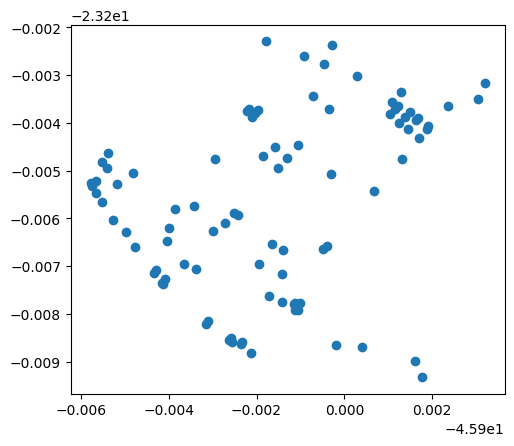

In [12]:
nodos, aristas = ox.graph_to_gdfs(rede)
nodos.plot()
plt.show()

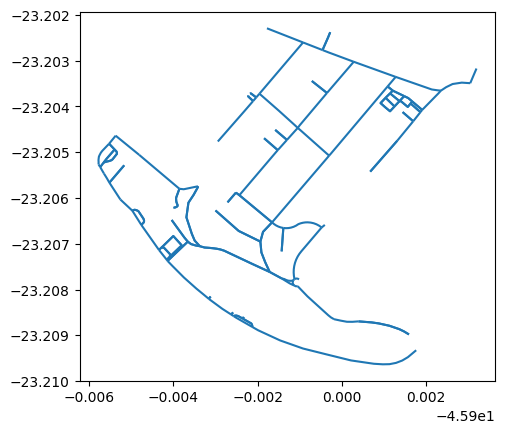

In [13]:
aristas.plot()
plt.show()

In [14]:
nodos.head()

,y,x,street_count,highway,geometry
osmid,,,,,
1261491124,-23.204638,-45.905373,3,NaN,POINT (-45.90537 -23.20464)
1418089633,-23.205266,-45.905780,3,NaN,POINT (-45.90578 -23.20527)
1420073201,-23.208695,-45.899601,3,NaN,POINT (-45.89960 -23.20869)
1424195323,-23.203654,-45.897642,3,traffic_signals,POINT (-45.89764 -23.20365)
1424234587,-23.203491,-45.896944,5,traffic_signals,POINT (-45.89694 -23.20349)


In [15]:
aristas.head()

,,,osmid,oneway,name,highway,reversed,length,lanes,maxspeed,geometry,junction,service
u,v,key,,,,,,,,,,,
1261491124,1424298832,0,129016025,True,Rua Paulo Édson Blair,residential,False,73.915,NaN,NaN,"LINESTRING (-45.90537 -23.20464, -45.90481 -23...",NaN,NaN
1418089633,8234296556,0,312812177,True,Avenida São João,primary,False,59.333,2,60,"LINESTRING (-45.90578 -23.20527, -45.90578 -23...",NaN,NaN
1420073201,3468699428,0,339656227,False,Rua Francisco Ricci,tertiary,True,128.228,NaN,50,"LINESTRING (-45.89960 -23.20869, -45.89929 -23...",NaN,NaN
1424195323,1424234587,0,754630571,True,Avenida Heitor Villa Lobos,secondary,False,75.890,3,50,"LINESTRING (-45.89764 -23.20365, -45.89752 -23...",NaN,NaN
1424234587,1426968854,0,324995632,True,Avenida Nove de Julho,secondary,False,38.700,3,50,"LINESTRING (-45.89694 -23.20349, -45.89680 -23...",NaN,NaN


In [16]:
import pandas as pd

In [17]:
pd.unique(predios['building'])

array(['apartments', 'church', 'yes', 'residential', 'retail', 'detached',
       'commercial', 'shed', 'house', 'office', 'school', 'government',
       'terrace', 'warehouse', 'roof', 'hotel', 'semidetached_house',
       'garage', 'carport'], dtype=object)

In [18]:
predios.columns

Index(['amenity', 'geometry', 'nodes', 'addr:housenumber', 'addr:street',
       'building', 'building:levels', 'name', 'denomination', 'religion',
       'addr:city', 'addr:postcode', 'addr:suburb', 'air_conditioning',
       'brand', 'brand:wikidata', 'brand:wikipedia', 'email', 'fax',
       'internet_access', 'phone', 'tourism', 'website', 'wheelchair',
       'wikidata', 'official_name', 'building:colour', 'building:flats',
       'contact:facebook', 'contact:instagram', 'contact:twitter',
       'contact:youtube', 'opening_hours', 'payment:american_express',
       'payment:cash', 'payment:credit_cards', 'payment:debit_cards',
       'payment:maestro', 'payment:mastercard', 'payment:visa',
       'payment:visa_electron', 'shop', 'roof:levels', 'roof:shape', 'massage',
       'cuisine', 'office', 'check_date', 'healthcare', 'clothes', 'beauty',
       'contact:whatsapp', 'disused:shop', 'isced:level', 'short_name',
       'leisure', 'sport', 'contact:linkedin', 'payment:paypal', '

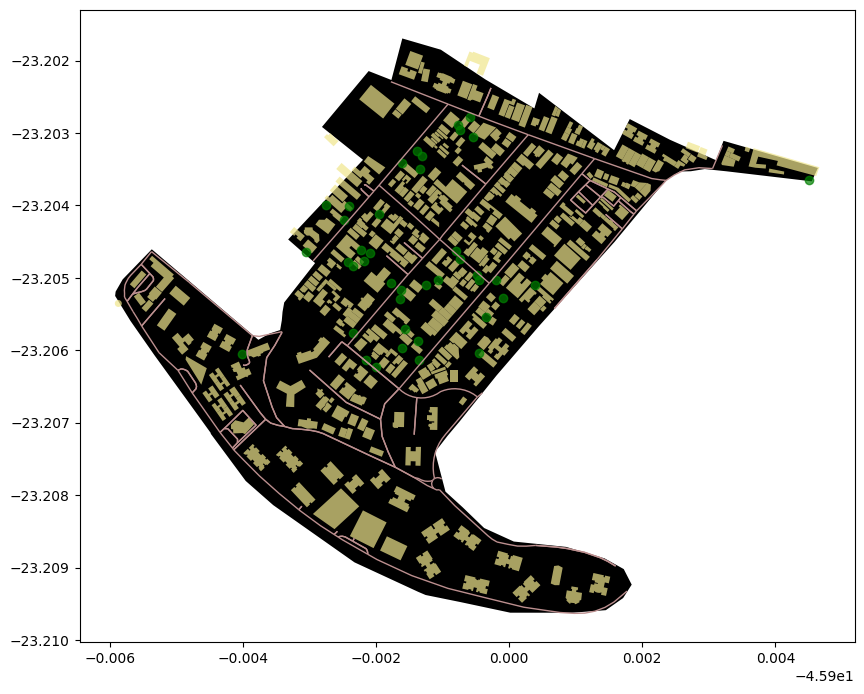

In [19]:
fig, ax = plt.subplots(figsize=(10,10))

area.plot(ax=ax, facecolor='black')
aristas.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')
predios.plot(ax=ax, facecolor='khaki', alpha=0.7)
arvores.plot(ax=ax, color='green', alpha=0.7)

plt.show()

In [20]:
predios.shape

(388, 85)

In [22]:
predios_sub = predios[['geometry', 'building']]
predios_sub.head()

geometry  \
element_type osmid                                                          
way          303894210  POLYGON ((-45.90107 -23.20216, -45.90104 -23.2...   
             303894211  POLYGON ((-45.90172 -23.20259, -45.90189 -23.2...   
             307255378  POLYGON ((-45.90511 -23.20521, -45.90501 -23.2...   
             307255379  POLYGON ((-45.90518 -23.20573, -45.90529 -23.2...   
             307255380  POLYGON ((-45.90507 -23.20583, -45.90504 -23.2...   

                          building  
element_type osmid                  
way          303894210  apartments  
             303894211      church  
             307255378         yes  
             307255379         yes  
             307255380  apartments

In [23]:
predios_sub.index

MultiIndex([(     'way',  303894210),
            (     'way',  303894211),
            (     'way',  307255378),
            (     'way',  307255379),
            (     'way',  307255380),
            (     'way',  307255381),
            (     'way',  307255382),
            (     'way',  307255383),
            (     'way',  307255384),
            (     'way',  328486646),
            ...
            (     'way',  726188625),
            (     'way',  726188626),
            (     'way',  746675213),
            (     'way',  764234680),
            (     'way',  793216751),
            (     'way',  793298798),
            (     'way',  793298799),
            (     'way',  825212513),
            (     'way', 1187916810),
            ('relation',    9991576)],
           names=['element_type', 'osmid'], length=388)

In [24]:
predios_sub.to_file('output/predios.shp')

/var/folders/pc/mkcyyvhd0vggcpltg8x7prb80000gn/T/ipykernel_4949/2338908529.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  predios_sub.to_file('output/predios.shp')


# Reclasificar datos

In [25]:
import geopandas as gpd

De Helsinki Region Travel Time Matrix 2015

In [26]:
data = gpd.read_file('data/TravelTimes_to_5975375_RailwayStation.shp')
data.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,30133,50,31872,56,5785642,32940,121,146,32940,113,133,5975375,29626,423,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,32690,54,34429,60,5785643,33233,125,150,33233,117,144,5975375,29919,427,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,31872,42,31834,48,5787544,32127,109,126,32127,101,121,5975375,31674,452,"POLYGON ((381250.000 6697500.000, 381000.000 6..."


In [27]:
# datos NN fueron puestos como -1
data = data[data['pt_r_tt'] >= 0]
data.shape

(13020, 15)

/Users/wpcasas/Lab/pygeo/.venv_pygeo/lib/python3.9/site-packages/geopandas/plotting.py:777: UserWarning: Numba not installed. Using slow pure python version.
  binning = mapclassify.classify(


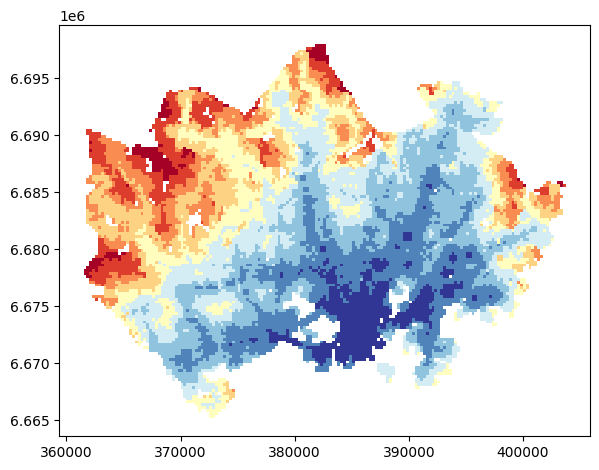

In [28]:
data.plot(column='pt_r_tt', scheme='Fisher_Jenks', k=9, cmap='RdYlBu_r', linewidth=0, legend=True, legend_kwds={'bbox_to_anchor':(1.10,0.82,0.3,0.2)})
plt.tight_layout()
plt.show()

In [29]:
data = data[data['walk_t'] >= 0]
data.shape

(12993, 15)

/Users/wpcasas/Lab/pygeo/.venv_pygeo/lib/python3.9/site-packages/geopandas/plotting.py:777: UserWarning: Numba not installed. Using slow pure python version.
  binning = mapclassify.classify(


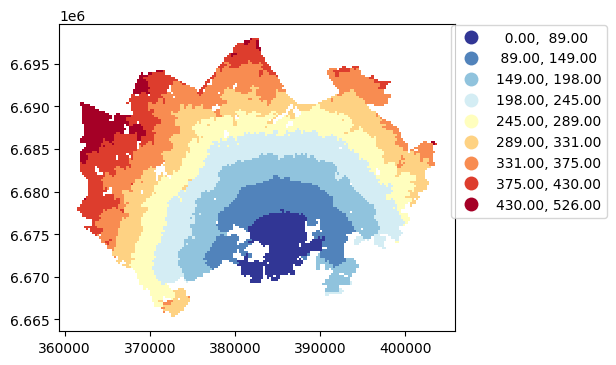

In [30]:
data.plot(column='walk_t', scheme='Fisher_Jenks', k=9, cmap='RdYlBu_r', linewidth=0, legend=True, legend_kwds={'bbox_to_anchor':(1.10,0.82,0.3,0.2)})
plt.tight_layout()
plt.show()

In [32]:
import pysal as ps
import mapclassify

In [33]:
import numpy as np

In [34]:
np.random.seed(123456)

In [35]:
# K es el numero de clases
classifier = mapclassify.NaturalBreaks(data['pt_r_tt'], k=9)
classifier

NaturalBreaks

    Interval       Count
------------------------
[  0.00,  31.00] |   926
( 31.00,  43.00] |  2272
( 43.00,  54.00] |  2453
( 54.00,  66.00] |  2197
( 66.00,  78.00] |  1625
( 78.00,  90.00] |  1511
( 90.00, 104.00] |  1001
(104.00, 126.00] |   786
(126.00, 199.00] |   222

classifier solo indica los intervalos y classifications hace la clasificacion

In [44]:
classifications = data[['pt_r_tt']].apply(classifier)
classifications.head()

,pt_r_tt
0,8
1,8
2,8
3,8
4,7


In [45]:
classifications.columns = ['nb_pt_r_tt']

In [46]:
classifications.head()

,nb_pt_r_tt
0,8
1,8
2,8
3,8
4,7


In [49]:
#data = data.drop('nb_pt_r_tt', axis=1)

In [50]:
data = data.join(classifications)
data.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry,nb_pt_r_tt
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((382000.000 6697750.000, 381750.000 6...",8
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((382250.000 6697750.000, 382000.000 6...",8
2,30133,50,31872,56,5785642,32940,121,146,32940,113,133,5975375,29626,423,"POLYGON ((382500.000 6697750.000, 382250.000 6...",8
3,32690,54,34429,60,5785643,33233,125,150,33233,117,144,5975375,29919,427,"POLYGON ((382750.000 6697750.000, 382500.000 6...",8
4,31872,42,31834,48,5787544,32127,109,126,32127,101,121,5975375,31674,452,"POLYGON ((381250.000 6697500.000, 381000.000 6...",7


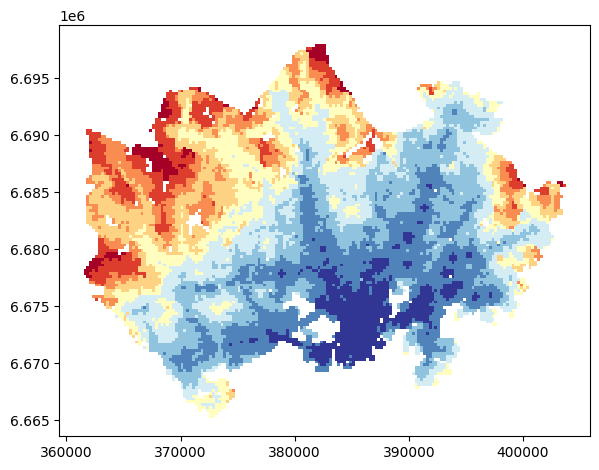

In [51]:
data.plot(column='nb_pt_r_tt', cmap='RdYlBu_r', linewidth=0)
plt.tight_layout()
plt.show()

# Análisis basada en criterio

In [52]:
def classificador(row, src_col_1, src_col_2, lim1, lim2, saida):
    if row[src_col_1] < lim1 and row[src_col_2] > lim2:
        row[saida] = 1
    else:
        row[saida] = 0
    return row

In [53]:
data['boa_area'] = None

In [55]:
data = data.apply(classificador, src_col_1='pt_r_tt', src_col_2='walk_t', lim1=30, lim2=20, saida='boa_area', axis=1)
data.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry,nb_pt_r_tt,boa_area
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((382000.000 6697750.000, 381750.000 6...",8,0
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((382250.000 6697750.000, 382000.000 6...",8,0
2,30133,50,31872,56,5785642,32940,121,146,32940,113,133,5975375,29626,423,"POLYGON ((382500.000 6697750.000, 382250.000 6...",8,0
3,32690,54,34429,60,5785643,33233,125,150,33233,117,144,5975375,29919,427,"POLYGON ((382750.000 6697750.000, 382500.000 6...",8,0
4,31872,42,31834,48,5787544,32127,109,126,32127,101,121,5975375,31674,452,"POLYGON ((381250.000 6697500.000, 381000.000 6...",7,0


In [56]:
data['boa_area'].value_counts()

boa_area
0    12323
1      670
Name: count, dtype: int64

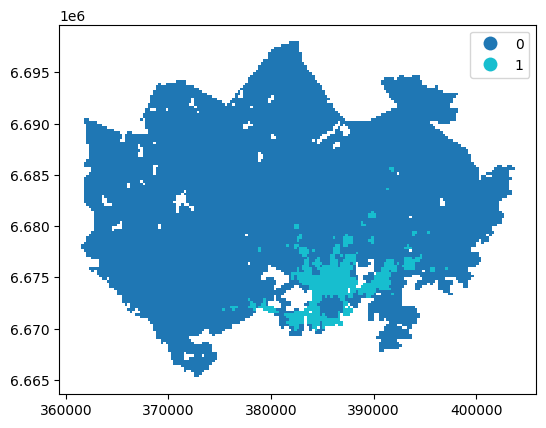

In [57]:
data.plot(column='boa_area', linewidth=0, legend=True, categorical=True)
plt.show()


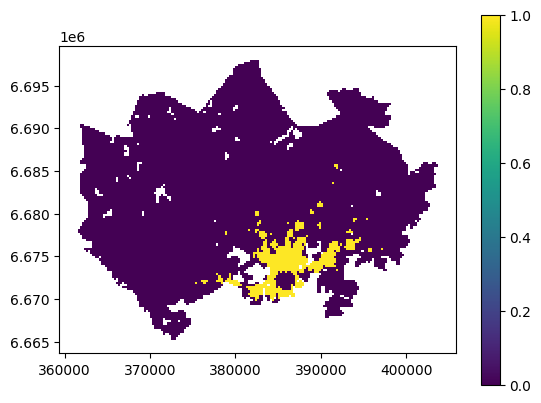

In [58]:
# Sin el categorical aparece la barra de 0 a 1 como si fuese continuo
data.plot(column='boa_area', linewidth=0, legend=True)
plt.show()

# Análisis de la vecindad

In [1]:
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points

In [2]:
origen = Point(1, 1.67)
dest1, dest2, dest3 = Point(0, 1.45), Point(2, 2), Point(0, 2.5)

In [3]:
destinos = MultiPoint([dest1, dest2, dest3])
print(destinos)

MULTIPOINT (0 1.45, 2 2, 0 2.5)


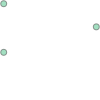

In [4]:
destinos

In [5]:
geoms_prox = nearest_points(origen, destinos)
geoms_prox

(<POINT (1 1.67)>, <POINT (0 1.45)>)

In [6]:
near_idx0 = geoms_prox[0]
near_idx1 = geoms_prox[1]

print(geoms_prox)
print(near_idx0)
print(near_idx1)

(<POINT (1 1.67)>, <POINT (0 1.45)>)
POINT (1 1.67)
POINT (0 1.45)


## Usando Geopandas en vez de shapely

In [7]:
import geopandas as gpd

In [8]:
fp1 = 'data/rset_sjc.shp'
fp2 = 'data/bares_sjc.shp'

In [9]:
df1 = gpd.read_file(fp1)
df2 = gpd.read_file(fp2)

In [10]:
df1.crs == df2.crs

False

In [11]:
df1.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [12]:
df2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Pasamos a un crs de distancias

In [13]:
df2 = df2.to_crs(crs ='epsg:32723')
df1 = df1.to_crs(crs ='epsg:32723')

In [14]:
df1['centroide'] = df1.centroid
df1.head()

,index,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry,centroide
0,42083,107665.0,354990405000001,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42084,"POLYGON ((409346.172 7435964.463, 409471.216 7...",POINT (409510.767 7435826.717)
1,42084,107666.0,354990405000002,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42085,"POLYGON ((409346.172 7435964.463, 409308.224 7...",POINT (409607.424 7436217.603)
2,42085,107667.0,354990405000003,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42086,"POLYGON ((409434.603 7436167.168, 409554.310 7...",POINT (409827.230 7436150.490)
3,42086,107668.0,354990405000004,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42087,"POLYGON ((409837.547 7436121.894, 409891.118 7...",POINT (409869.626 7436100.079)
4,42087,107669.0,354990405000005,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42088,"POLYGON ((409598.993 7436014.493, 409692.634 7...",POINT (409912.725 7436001.645)


In [15]:
df2.head()

,address,Bar,Endereço,geometry
0,"Rua Francisco Rafael, Jardim Bela Vista, São J...",Bar do Coronel,"R. Francisco Rafael, 298, São José Dos Campos",POINT (409587.000 7436079.610)
1,"Avenida Andrômeda, Jardim Estoril, São José do...",Snooker Music Bar,"Av Andrômeda 3330, São José Dos Campos",POINT (409441.438 7429174.079)
2,"Rua Inconfidência, Jardim São Dimas, São José ...",Kadu bar e creperia,"R. Inconfidencia, 298, São José Dos Campos",POINT (409112.020 7434383.853)
3,"Avenida Rui Barbosa, Vila Veneziani, Jardim Gu...",Boemia e Rapsodias,"Av. Rui Barbosa, 1985, São José Dos Campos",POINT (407392.594 7439651.973)


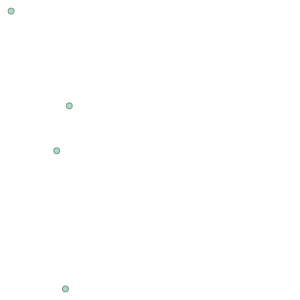

In [16]:
# Genera un multiponto con todos los pontos de los bares
union = df2.unary_union

union

In [17]:
print(union)

MULTIPOINT (407392.5941330363 7439651.972682398, 409112.0204830986 7434383.853368627, 409441.43799427606 7429174.078988718, 409587.00047683594 7436079.609673488)


In [19]:
# itero por todos los centroides, veo donde esta el bar mas proximo
df1['bar_prox'] = None

for i, row in df1.iterrows():
    prox = df2['Bar'][df2['geometry']==nearest_points(row['centroide'], union)[1]]
    df1.loc[i, 'bar_prox'] = prox.values[0]

In [20]:
prox.values[0]

'Boemia e Rapsodias'

In [21]:
df1.head()

,index,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry,centroide,bar_prox
0,42083,107665.0,354990405000001,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42084,"POLYGON ((409346.172 7435964.463, 409471.216 7...",POINT (409510.767 7435826.717),Bar do Coronel
1,42084,107666.0,354990405000002,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42085,"POLYGON ((409346.172 7435964.463, 409308.224 7...",POINT (409607.424 7436217.603),Bar do Coronel
2,42085,107667.0,354990405000003,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42086,"POLYGON ((409434.603 7436167.168, 409554.310 7...",POINT (409827.230 7436150.490),Bar do Coronel
3,42086,107668.0,354990405000004,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42087,"POLYGON ((409837.547 7436121.894, 409891.118 7...",POINT (409869.626 7436100.079),Bar do Coronel
4,42087,107669.0,354990405000005,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42088,"POLYGON ((409598.993 7436014.493, 409692.634 7...",POINT (409912.725 7436001.645),Bar do Coronel


# Corregir geometrias invalidas

In [22]:
veg = gpd.read_file('data/ganho_veg.shp')
veg.head()

,Id,gridcode,geometry
0,46238,3,"POLYGON ((-40.22827 -15.34987, -40.22827 -15.3..."
1,46317,3,"POLYGON ((-40.24524 -15.35661, -40.24509 -15.3..."
2,46318,2,"POLYGON ((-40.17437 -15.35661, -40.17503 -15.3..."
3,46319,2,"POLYGON ((-40.17302 -15.35661, -40.17368 -15.3..."
4,46389,3,"POLYGON ((-40.24524 -15.35661, -40.24534 -15.3..."


In [24]:
import matplotlib.pyplot as plt

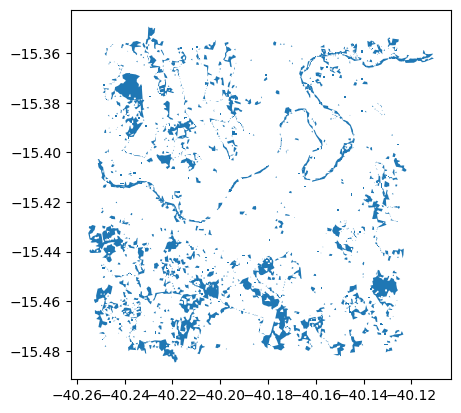

In [25]:
veg.plot()
plt.show()

In [27]:
# Validamos que las geometrias sean validas
veg.is_valid

0        True
1        True
2        True
3        True
4        True
        ...  
1429     True
1430     True
1431     True
1432     True
1433    False
Length: 1434, dtype: bool

In [28]:
# Cantidad de lineas invalidas
(veg[veg.is_valid == False]).shape

(24, 3)

In [29]:
from shapely.validation import make_valid

In [30]:
dados_editados = veg.copy()

In [31]:
for index, row in dados_editados.iterrows():
    dados_editados.loc[index, 'geometry'] = make_valid(row['geometry'])

In [32]:
dados_editados[dados_editados.is_valid == False]

,Id,gridcode,geometry


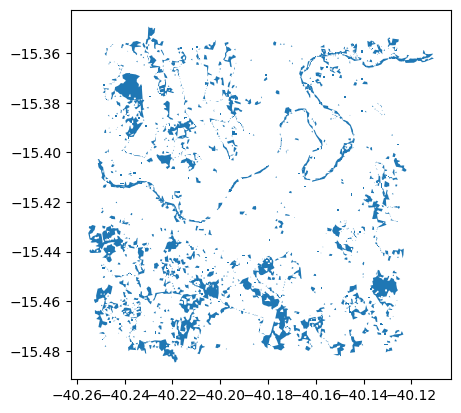

In [33]:
dados_editados.plot()
plt.show()

In [34]:
print(dados_editados.shape)
print(veg.shape)

(1434, 3)
(1434, 3)


In [35]:
dados_editados.to_file('output/ganho_veg_valid.shp')